## 1.Problem Statement:- To predict the quality of apples based on their characteristics.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as ss #Q-Q plot For checking Gausion Distribution
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score , confusion_matrix ,\
ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,roc_auc_score
import pickle

## 2. Data collection 

In [2]:
data = pd.read_csv(r"C:\Users\Manoj\Downloads\Compressed\apple_quality.csv")

In [3]:
datac=data.copy() #Copy of actual data

## 3. EDA for understanding the data

In [4]:
datac.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
datac.info() #to check null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
datac.duplicated().sum() #to check duplicate values

0

In [7]:
datac.isnull().sum() # Checking missing value

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
datac[datac.isnull().any(axis=1)] # Checking where is the missing value

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [9]:
datac.drop(4000,axis=0,inplace=True) #drop row

In [10]:
datac['Acidity']=datac['Acidity'].astype(float) #changing the datatype

In [11]:
datac['Quality'].value_counts() # checking data is balance or not 

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [12]:
datac.shape # Checking shape

(4000, 9)

### Dividing Feature variable and Class lable

In [13]:
fv= datac.iloc[:,1:-1]
cl=datac.iloc[:,-1]

In [14]:
fv.head(3)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636


In [15]:
cl.head(3)

0    good
1    good
2     bad
Name: Quality, dtype: object

In [16]:
cl=cl.map({'good':1,'bad':0})

### Splitting the data into train,cross-validation and test

In [17]:
x_train,x_test,y_train,y_test = train_test_split(fv,cl,test_size=0.2,random_state=1,stratify=cl)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=1,stratify=y_train)

In [18]:
x_train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
2812,-3.377694,2.053683,0.794257,-3.528962,-2.071871,1.137396,-4.110373
3422,2.070360,-1.410480,-4.038794,3.042827,-1.834687,1.440387,0.461314
740,-2.161941,-0.014473,0.042407,1.724669,2.092703,-0.768827,-3.133213
2817,-1.219903,-3.525281,3.821567,1.790596,1.920792,0.234291,0.375622
2676,-6.710169,1.035163,-0.443713,-1.155560,2.526025,3.678178,-0.820280


## 4.Data pre-processing

### Q-Q plot For checking Gausion Distribution

Size


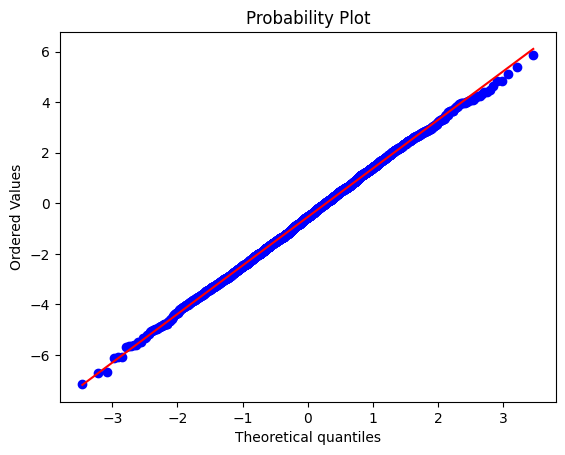

Weight


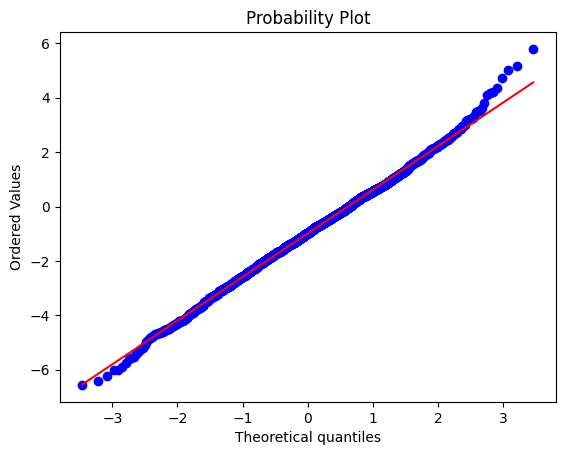

Sweetness


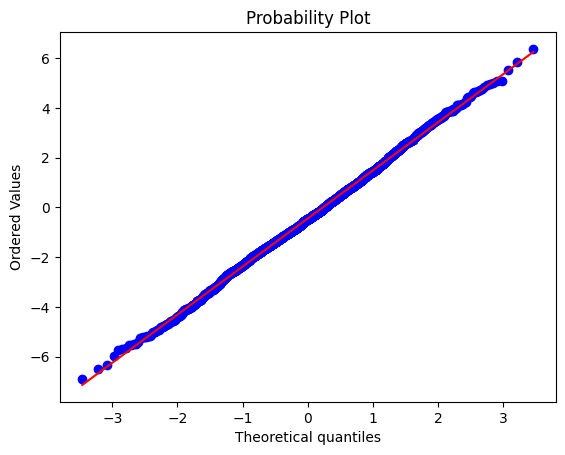

Crunchiness


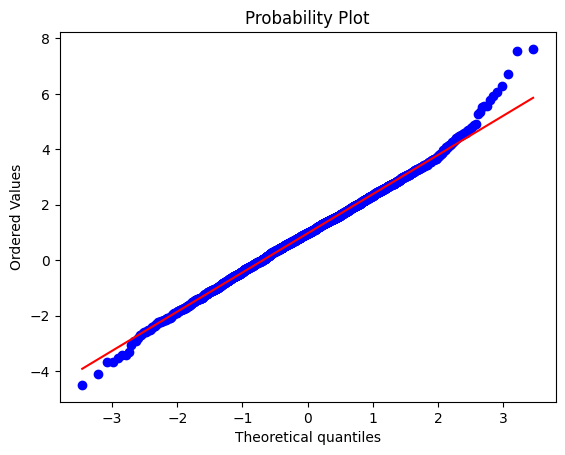

Juiciness


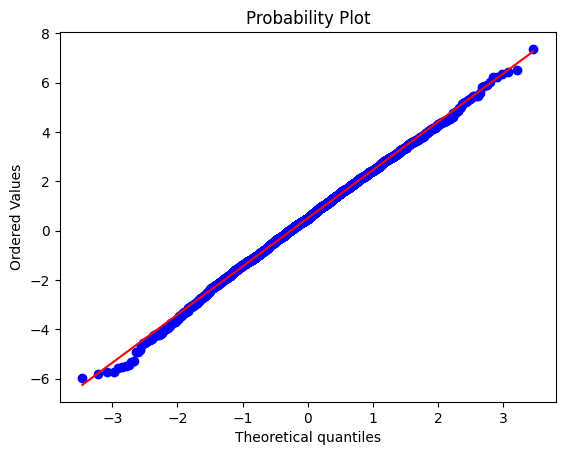

Ripeness


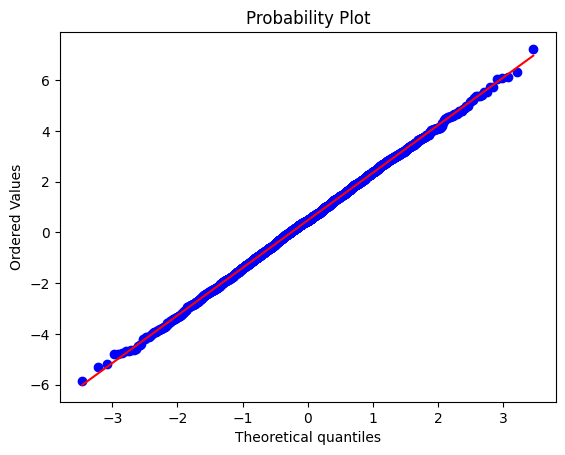

Acidity


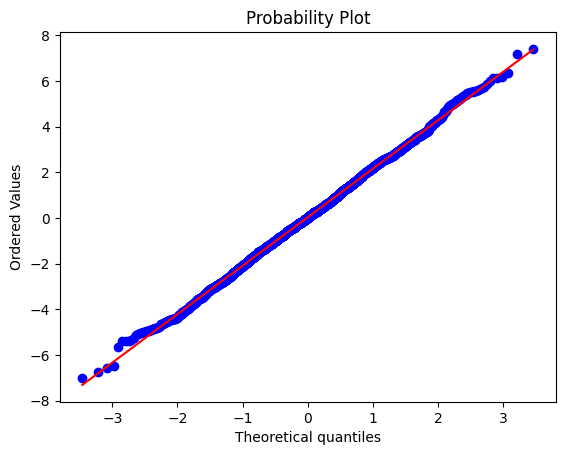

In [19]:
for y in x_train.columns:
    plt.subplot(111)
    ss.probplot(x_train[y],dist='norm', fit=True, plot=plt)
    print(y)
    plt.show()

## 4.EDA

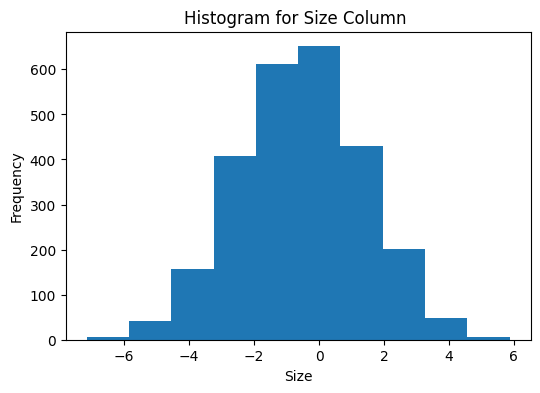

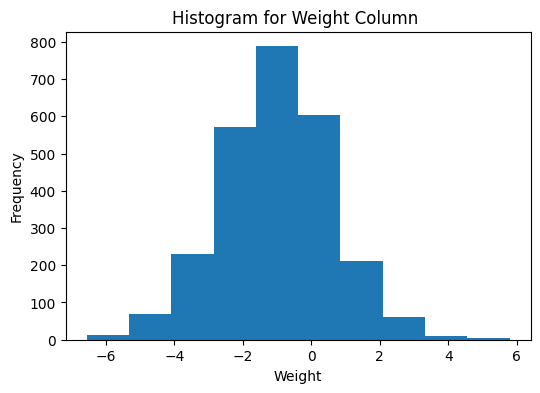

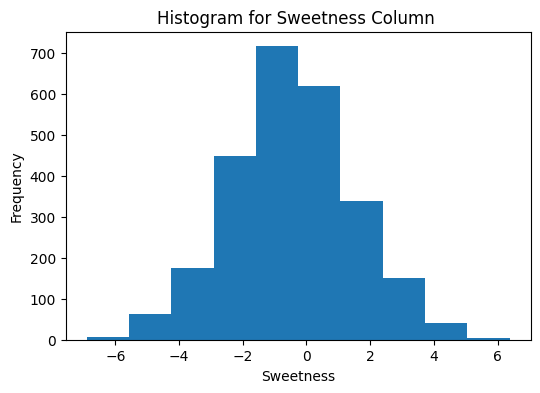

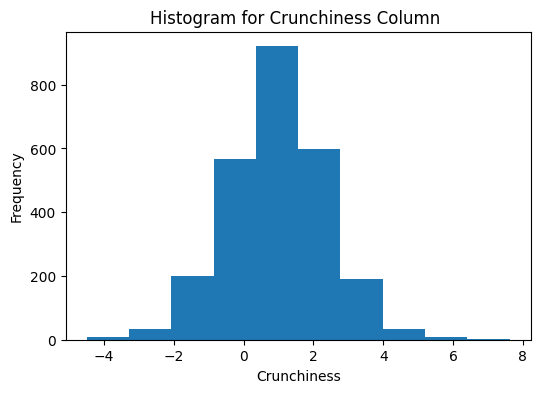

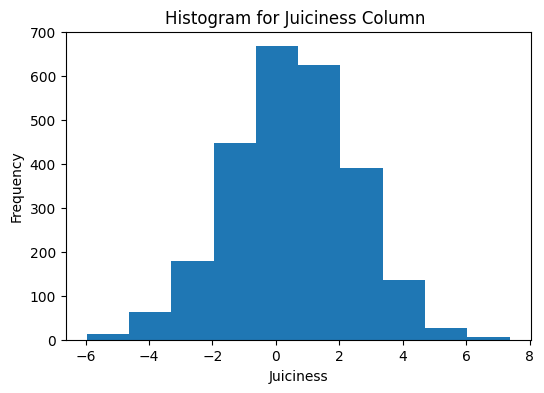

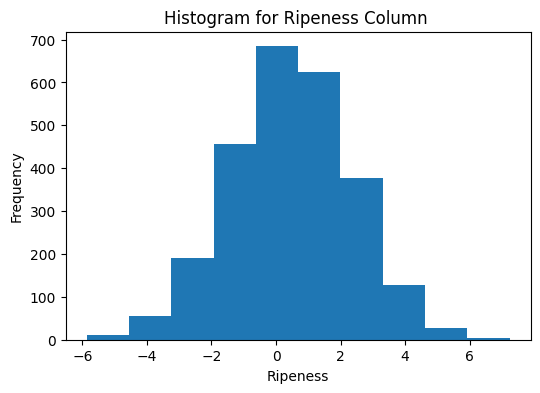

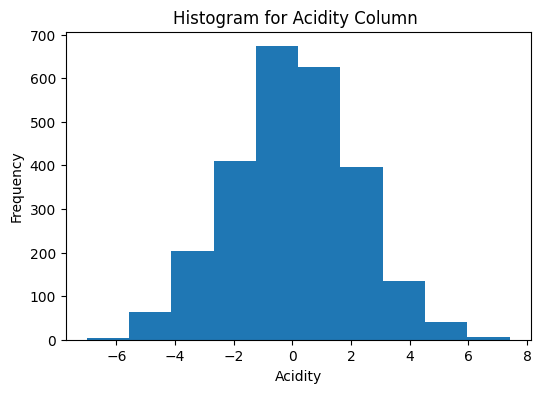

In [20]:
for y in x_train.columns:
    plt.figure(figsize=(6,4))
    x_train[y].plot(kind='hist')
    plt.title(f'Histogram for {y} Column ')
    plt.xlabel(y)
    plt.show()

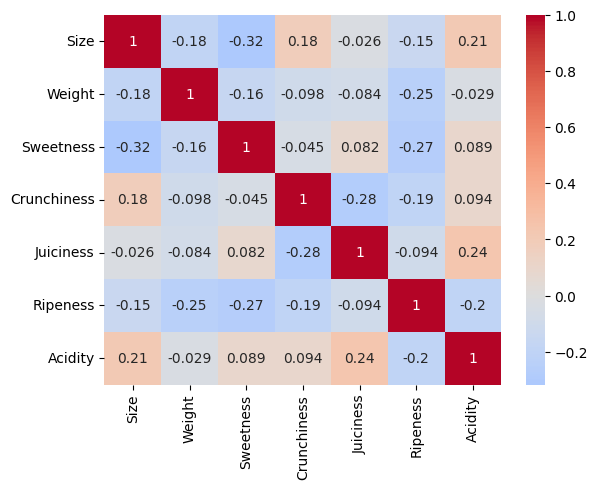

In [21]:
sns.heatmap(data=x_train.corr(), annot=True, cmap='coolwarm',center=0)
plt.show()

### Applying Pipeline

In [22]:
x_train.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [23]:
pip=Pipeline([('Scaling',StandardScaler())])

In [24]:
ctp=ColumnTransformer([('numerical',pip,x_train.columns)],remainder='passthrough')

In [25]:
ctp

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('Scaling',
                                                  StandardScaler())]),
                                 Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object'))])

In [26]:
x_trainp=ctp.fit_transform(x_train)
x_cv_p = ctp.transform(x_cv)
x_testp = ctp.transform(x_test)

## 5.Training

In [27]:
gb=GaussianNB()

In [28]:
model=gb.fit(x_trainp,y_train)

In [29]:
predict_yi=model.predict(x_cv_p)

### Checking Accuracy

In [30]:
accuracy_score(y_cv,predict_yi)

0.7265625

### Confusion Matrix

In [31]:
cm = confusion_matrix(y_cv,predict_yi)

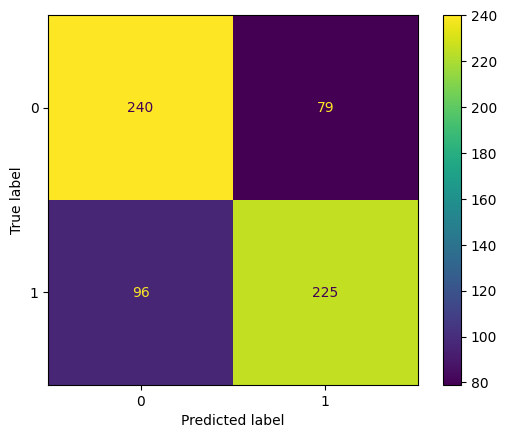

In [32]:
i=ConfusionMatrixDisplay(cm)
i.plot()
plt.show()

### Classification Report

In [33]:
print(classification_report(y_cv,predict_yi))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       319
           1       0.74      0.70      0.72       321

    accuracy                           0.73       640
   macro avg       0.73      0.73      0.73       640
weighted avg       0.73      0.73      0.73       640



## 6.Testing

In [34]:
predict_yi=model.predict(x_testp)
accuracy_score(y_test,predict_yi)

0.74875

## 7.Deployment

In [35]:
pickle.dump(model,open(r"C:\Users\Manoj\Desktop\New folder (2)\apple_model.pkl","wb")) #Serielization

In [36]:
pickle.dump(ctp,open(r"C:\Users\Manoj\Desktop\New folder (2)\apple_pre_p.pkl","wb")) #Serielization

In [37]:
fm=pickle.load(open(r"C:\Users\Manoj\Desktop\New folder (2)\apple_model.pkl","rb")) #Deserialization

In [38]:
pre_p=pickle.load(open(r"C:\Users\Manoj\Desktop\New folder (2)\apple_pre_p.pkl","rb")) #Deserialization